# Sensitivity Analysis

In [1]:
import numpy as np

In [2]:
y0 = np.array([4.5, 1.5])

In [3]:
R.<x,y> = QQ[]
odes = vector([-y, x])

In [4]:
import sympy
t_ = sympy.var('_')

In [5]:
list(odes)

[-y, x]

In [6]:
def convert_mat(m):
    return sympy.Matrix([[SR(e)._sympy_() for e in r]
                         for r in m.rows()])

In [7]:
def convert_vec(v):
    return [SR(e)._sympy_() for e in v]

In [8]:
def vec_to_numpy(R, v):
    t_ = sympy.var('t_')
    return sympy.lambdify((t_, convert_vec(R.gens())),
                          convert_vec(v),
                          modules='numpy')

def mat_to_numpy(R, m):
    t_ = sympy.var('t_')
    return sympy.lambdify((t_, convert_vec(R.gens())),
                          convert_mat(m),
                          modules='numpy')

In [9]:
vec_to_numpy(R, odes)(0, np.array([1,2]))

[-2, 1]

In [10]:
mat_to_numpy(R, jacobian(odes, R.gens()))(0, np.array([1, 2]))

array([[ 0, -1],
       [ 1,  0]])

In [11]:
convert_vec(vector([-y, x]))

[-y, x]

In [12]:
sympy.Matrix([[e._sympy_() for e in r] for r in Matrix([[1,2], [3,4]]).rows()])

Matrix([
[1, 2],
[3, 4]])

In [13]:
SR(Matrix([[1,2], [3,4]]))._sympy_()

[1 2]
[3 4]

In [14]:
def jac(t, v):
    return jacobian(odes, R.gens()).subs(dict(zip(R.gens(), v))).numpy()

In [15]:
jac(0, np.array([3,2]))

array([[0, -1],
       [1, 0]], dtype=object)

In [16]:
def f(t, x): return np.array([-x[1], x[0]]) 

In [17]:
f(0, [1,2])

array([-2,  1])

In [18]:
from scipy.integrate import solve_ivp

In [19]:
sln = solve_ivp(f, (0, 10), y0, method='LSODA', jac=jac, vectorized=True,
                events=[(lambda t, x: x[0])],
                dense_output=True)
sln

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 128
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f032f206f90>
   status: 0
  success: True
        t: array([ 0.        ,  0.01054209,  0.02108418,  0.13608572,  0.25108726,
        0.3660888 ,  0.64557237,  0.92505595,  1.20453953,  1.37031421,
        1.5360889 ,  1.70186358,  1.86763826,  1.93769171,  2.00774515,
        2.0777986 ,  2.3625439 ,  2.64728921,  2.93203452,  3.21677982,
        3.50152513,  3.78627044,  4.07101575,  4.3014447 ,  4.53187366,
        4.76230262,  4.99273158,  5.07426596,  5.15580034,  5.23733472,
        5.52313162,  5.80892851,  6.0947254 ,  6.3805223 ,  6.4573511 ,
        6.5341799 ,  6.6110087 ,  6.89046806,  7.16992742,  7.44938678,
        7.72884614,  7.92116269,  8.11347923,  8.30579578,  8.49811233,
        8.61228097,  8.7264496 ,  8.84061824,  9.11839163,  9.14472335,
        9.17105508,  9.1973868 ,  9.223

In [20]:
from itertools import cycle

In [21]:
zip(sln.t_events[0], cycle([0]))

[(1.249257269985202, 0), (4.391176875509009, 0), (7.532966619222182, 0)]

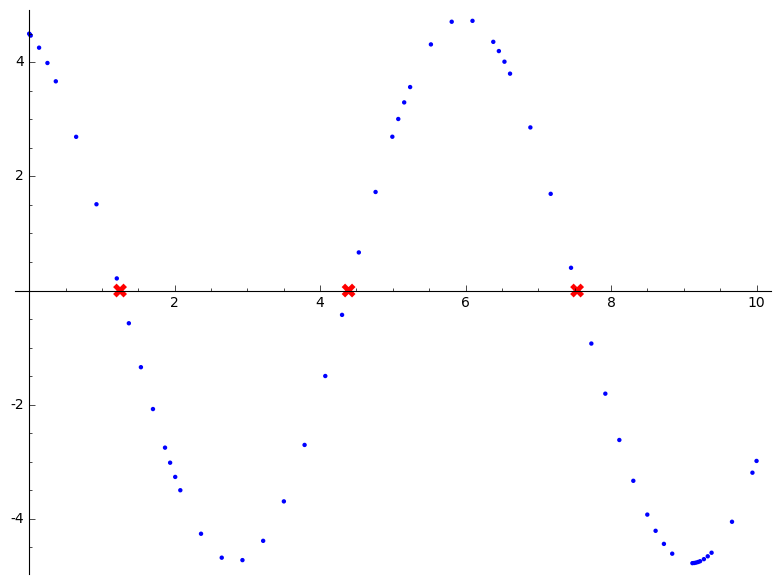

In [22]:
points(zip(sln.t, sln.y[0, :]))\
+ points(zip(sln.t_events[0], cycle([0])),
         color='red', marker='X', size=100)

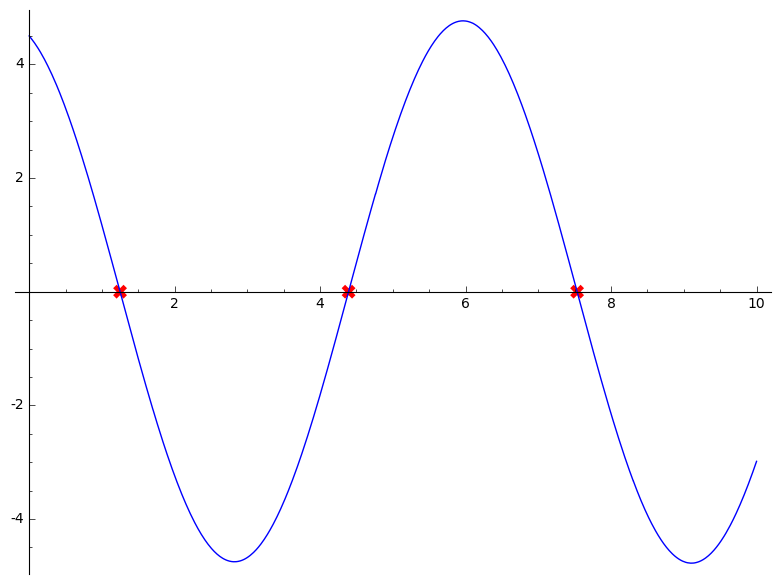

In [23]:
plot((lambda t: sln.sol(t)[0]), (0, 10))\
+ points(zip(sln.t_events[0], cycle([0])),
         color='red', marker='X', size=100)

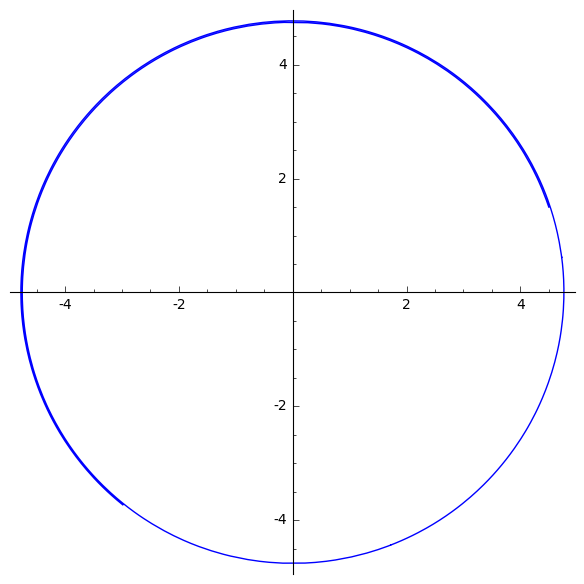

In [24]:
parametric_plot(((lambda t: sln.sol(t)[0]),
                 (lambda t: sln.sol(t)[1])),
                (0, 10))

In [25]:
load('lbuc.py')

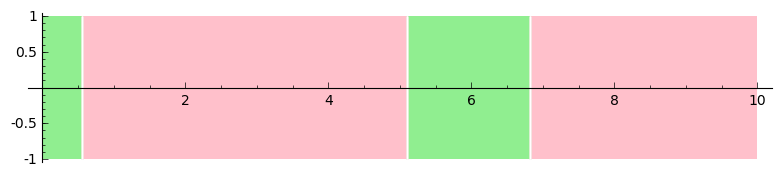

In [26]:
Atomic(x - 3).numerical_signal_for_system(odes, y0, 10).plot()

In [27]:
odes

(-y, x)

In [28]:
list(map(RIF, list(y0)))

[4.5000000000000000?, 1.5000000000000000?]

In [29]:
P = Atomic(x - 3.0)
reach = Reach(odes, [RIF(4.49,4.51), RIF(1.49,1.51)], 10, order=10, step=0.1)
print(reach.res)
rs = reach.roots(x - 3.0, -y)
rs

2


[0.556776?, 5.069888?, 6.840802?]

In [30]:
y01 = [RIF(4.49,4.51), RIF(1.49,1.51)]

In [31]:
P.dpdt(odes)

-y

Computed 1000 flowpipes in 2.81893897057 sec
Prepared for plotting in 2.68930101395 sec
  I  = [0.56000000000000005 .. 0.56056701925596153]
f(I) = [3.9558538666994991e-9 .. 0.029653115785193585]
  I  = [6.8399999999999998 .. 6.8437391506218788]
f(I) = [-2.9474813700858249e-8 .. 0.041304390223626975]
Monitored signal 8.49021601677 sec


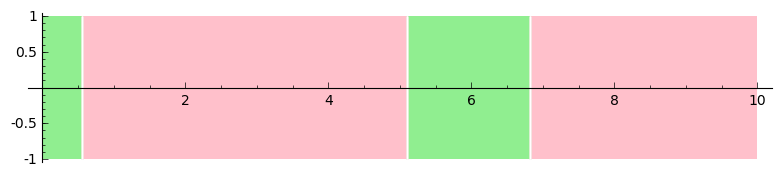

In [32]:
Atomic(x - 3.0).signal_for_system(odes, y01, 10).plot()

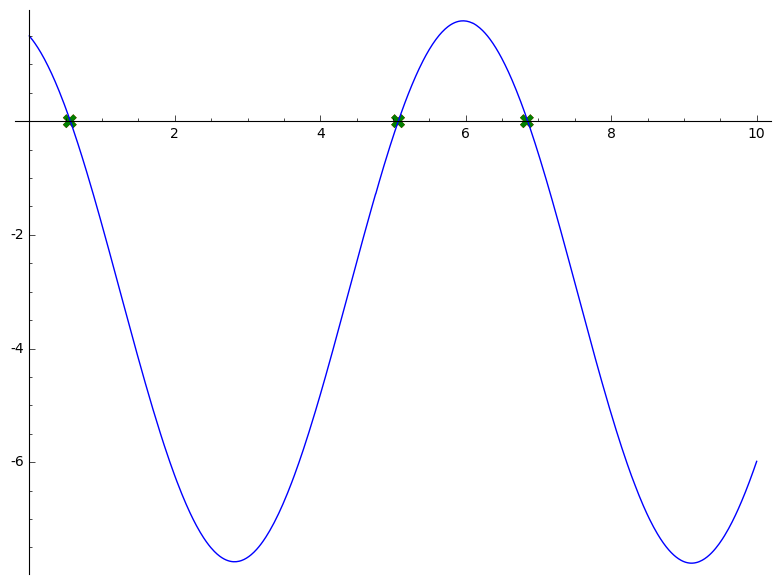

In [33]:
plot((lambda t: sln.sol(t)[0] - 3), (0, 10))\
 + points([(r.lower(), 0) for r in rs],
          color='red', marker='X', size=100)\
 + points([(r.upper(), 0) for r in rs],
          color='green', marker='X', size=100)#\
# + reach.sage_plot('x')

Computed 749 flowpipes in 1.77662801743 sec
Prepared for plotting in 2.2139980793 sec
  I  = [0.56000000000000005 .. 0.56056701925596153]
f(I) = [3.9558538666994991e-9 .. 0.029653115785193585]
  I  = [6.8399999999999998 .. 6.8437391506218788]
f(I) = [-2.9474813700858249e-8 .. 0.041304390223626975]
Monitored signal 6.40677404404 sec


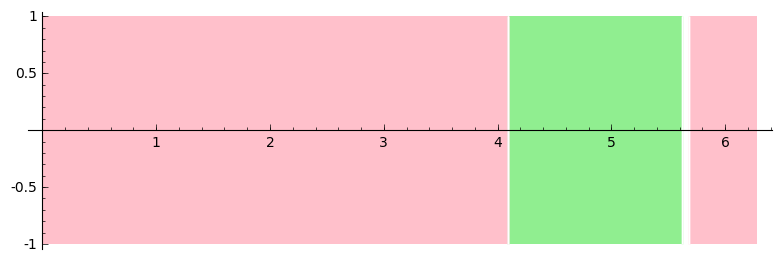

In [34]:
G(RIF(1,1.2), Atomic(x - 3)).signal_for_system(odes, y01, 2*pi).plot()

interval_signals.py:122: UserWarning: Inconsitient intervals [4.0728222341462183 .. 5.6526092220169764] (True) and [5.6526092220169754 .. 6.4831853071795873] (False) in signal!
  u.str(style='brackets'), bu))
interval_signals.py:122: UserWarning: Inconsitient intervals [4.0728222341462183 .. 5.6526092220169764] (True) and [5.6526092220169754 .. 6.2831853071795872] (False) in signal!
  u.str(style='brackets'), bu))


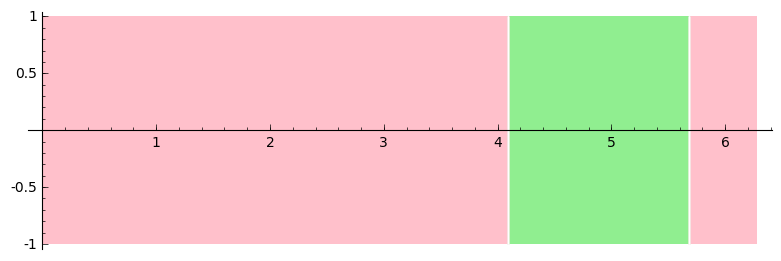

In [35]:
G(RIF(1,1.2), Atomic(x - 3)).numerical_signal_for_system(odes, y0, 2*pi).plot()

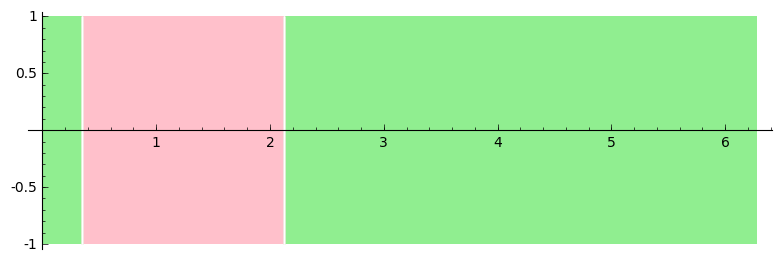

In [36]:
Atomic(3 - y).numerical_signal_for_system(odes, y0, 2*pi).plot()

Computed 629 flowpipes in 1.89476299286 sec
Prepared for plotting in 1.47783708572 sec
  I  = [2.1299999999999998 .. 2.1313610359883435]
f(I) = [-0.032565195361644151 .. -4.0067535955756738e-9]
Monitored signal 4.84640192986 sec


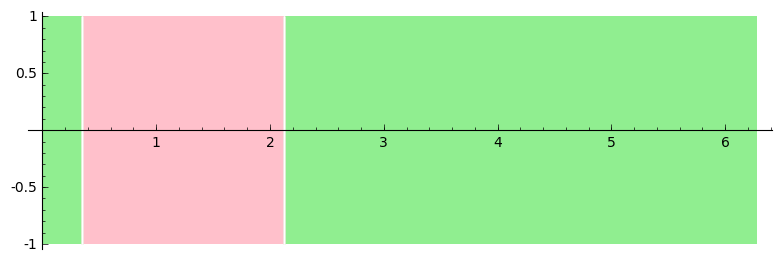

In [37]:
Atomic(3 - y).signal_for_system(odes, y01, 2*pi).plot()

Computed 1029 flowpipes in 2.65980219841 sec
Prepared for plotting in 2.562073946 sec
  I  = [2.1299999999999998 .. 2.1313610359883435]
f(I) = [-0.032565195361644151 .. -4.0067535955756738e-9]
  I  = [8.4100000000000001 .. 8.4145182280003486]
f(I) = [-0.044263709578001187 .. 5.1607653261953602e-8]
Monitored signal 8.93752288818 sec


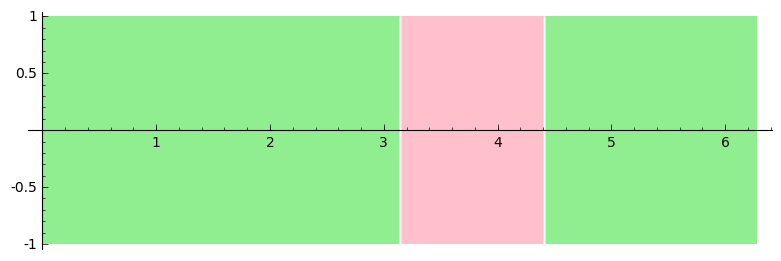

In [38]:
F(RIF(3.5,4), Atomic(3 - y)).signal_for_system(odes, y01, 2*pi).plot()

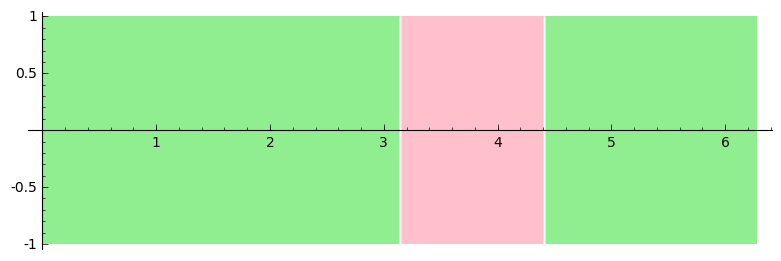

In [39]:
F(RIF(3.5,4), Atomic(3 - y)).numerical_signal_for_system(odes, y0, 2*pi).plot()

Computed 1029 flowpipes in 2.80299496651 sec
Prepared for plotting in 2.45690894127 sec
  I  = [0.56000000000000005 .. 0.56056701925596153]
f(I) = [3.9558538666994991e-9 .. 0.029653115785193585]
  I  = [6.8399999999999998 .. 6.8437391506218788]
f(I) = [-2.9474813700858249e-8 .. 0.041304390223626975]
  I  = [2.1299999999999998 .. 2.1313610359883435]
f(I) = [-0.032565195361644151 .. -4.0067535955756738e-9]
  I  = [8.4100000000000001 .. 8.4145182280003486]
f(I) = [-0.044263709578001187 .. 5.1607653261953602e-8]
Monitored signal 19.977946043 sec


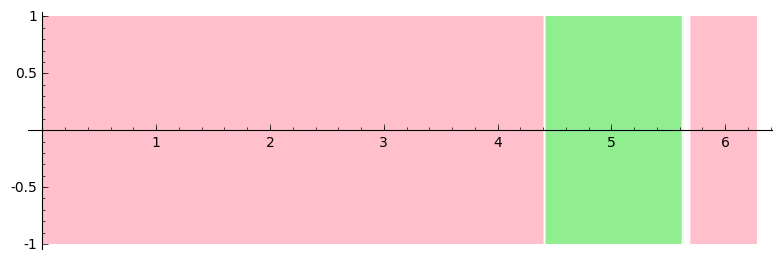

In [40]:
(G(RIF(1,1.2), Atomic(x - 3)) & F(RIF(3.5,4), Atomic(3 - y))).signal_for_system(odes, y01, 2*pi).plot()

interval_signals.py:122: UserWarning: Inconsitient intervals [4.0728223722879777 .. 5.6526089460790150] (True) and [5.6526089460790140 .. 9.2831853071795881] (False) in signal!
  u.str(style='brackets'), bu))
interval_signals.py:122: UserWarning: Inconsitient intervals [4.4245682451676380 .. 5.6526089460790150] (True) and [5.6526089460790140 .. 9.2831853071795881] (False) in signal!
  u.str(style='brackets'), bu))
interval_signals.py:122: UserWarning: Inconsitient intervals [4.4245682451676380 .. 5.6526089460790150] (True) and [5.6526089460790140 .. 6.2831853071795872] (False) in signal!
  u.str(style='brackets'), bu))


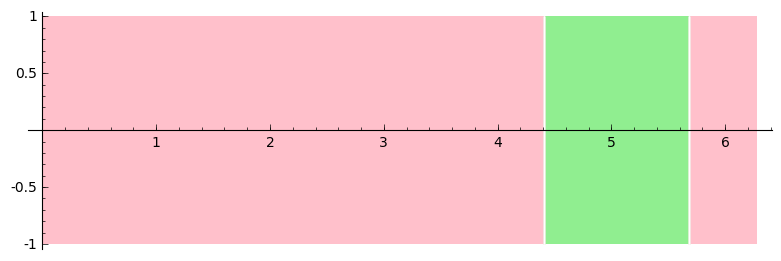

In [41]:
(G(RIF(1,1.2), Atomic(x - 3)) & F(RIF(3.5,4), Atomic(3 - y))).numerical_signal_for_system(odes, y0, 2*pi).plot()